## How accurate are the overall results of historical RAPTOR, which was used for the historical data charts (1977-2013), compared to those of modern RAPTOR’s integration (2013-Present)?

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

latest_df = pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
historical_df = pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

In [59]:
historical=pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
latest=pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

In [109]:
clean_df=merged_df

In [110]:
clean_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
total_players=clean_df.groupby("team")["player_name"].count()
raptor_total=clean_df.groupby("team")["raptor_total"].mean()
poss=clean_df.groupby("team")["poss"].mean()
war_total=clean_df.groupby("team")["war_total"].mean()
pace_impact=clean_df.groupby("team")["pace_impact"].mean()
raptor_onoff_total=clean_df.groupby("team")["raptor_onoff_total"].mean()

In [112]:
total_players.head()

team
ATL    1185
BOS    1222
BRK     340
BUF      37
CHA     380
Name: player_name, dtype: int64

In [113]:
raptor_total.head()

team
ATL   -1.570031
BOS   -1.199087
BRK   -1.191441
BUF   -2.715885
CHA   -2.366248
Name: raptor_total, dtype: float64

In [62]:
his_team_raptor_totals = historical.groupby("team")["raptor_total"].sum().reset_index()
his_team_raptor_totals.head()

,team,raptor_total
0,ATL,6.863266
1,BOS,-3.631239
2,BRK,-104.256530
3,CHA,-40.304983
4,CHI,-4.001443


In [63]:
lat_team_raptor_totals = latest.groupby("team")["raptor_total"].sum().reset_index()
lat_team_raptor_totals.head()

,team,raptor_total
0,ATL,-1867.349832
1,BOS,-1461.653071
2,BRK,-300.833420
3,BUF,-100.487762
4,CHA,-858.869307


In [108]:
merged_raptor_totals = lat_team_raptor_totals.merge(his_team_raptor_totals, on="team", suffixes=("_latest", "_historical"))

merged_raptor_totals.head()

,team,raptor_total_latest,raptor_total_historical
0,ATL,-1867.349832,6.863266
1,BOS,-1461.653071,-3.631239
2,BRK,-300.833420,-104.256530
3,CHA,-858.869307,-40.304983
4,CHI,-1531.152283,-4.001443


In [64]:
his_team_war_totals = historical.groupby("team")["war_total"].sum().reset_index()
his_team_war_totals.head()

,team,war_total
0,ATL,31.989519
1,BOS,57.010582
2,BRK,31.362127
3,CHA,12.818726
4,CHI,31.283879


In [65]:
lat_team_war_totals = latest.groupby("team")["war_total"].sum().reset_index()
lat_team_war_totals.head()  

,team,war_total
0,ATL,1319.084509
1,BOS,1712.529584
2,BRK,255.392848
3,BUF,36.396243
4,CHA,349.159085


In [107]:
merged_war_totals = his_team_war_totals.merge(lat_team_war_totals, on="team", suffixes=("_historical", "_latest"))

merged_war_totals.head()

,team,war_total_historical,war_total_latest
0,ATL,31.989519,1319.084509
1,BOS,57.010582,1712.529584
2,BRK,31.362127,255.392848
3,CHA,12.818726,349.159085
4,CHI,31.283879,1447.384776


In [66]:
merged_df = pd.merge(historical_df, latest_df, how="outer")
merged_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
average_his_team_raptor_total = historical.groupby("team")["raptor_total"].mean().reset_index()
average_his_team_raptor_total.head()

,team,raptor_total
0,ATL,0.228776
1,BOS,-0.113476
2,BRK,-2.673244
3,CHA,-2.121315
4,CHI,-0.222302


In [92]:
average_lat_team_raptor_total = latest.groupby("team")["raptor_total"].mean().reset_index()
average_lat_team_raptor_total.head()

,team,raptor_total
0,ATL,-1.616753
1,BOS,-1.228280
2,BRK,-0.999447
3,BUF,-2.715885
4,CHA,-2.379139


C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


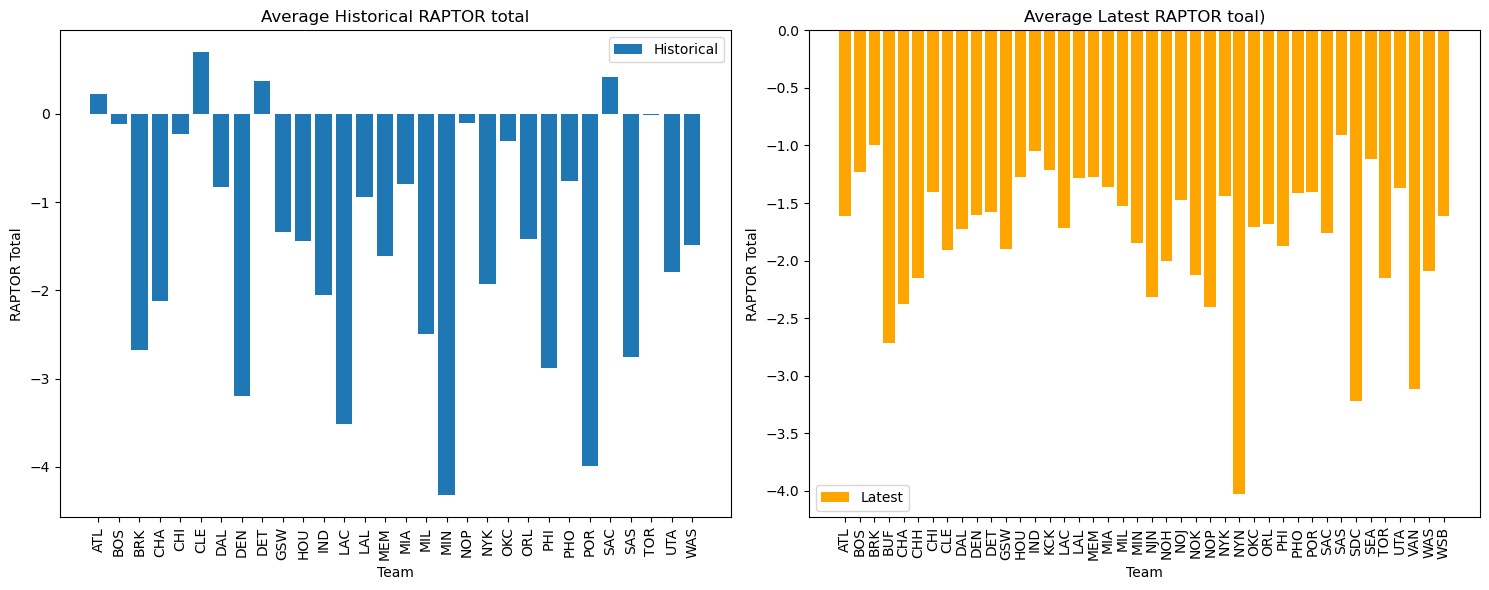

In [100]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot historical team RAPTOR means
axes[0].bar(his_team_raptor_means["team"], his_team_raptor_means["raptor_total"], label="Historical")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("RAPTOR Total")
axes[0].set_title("Average Historical RAPTOR total")
axes[0].set_xticklabels(his_team_raptor_means["team"], rotation=90)
axes[0].legend()

# Plot latest team RAPTOR means
axes[1].bar(lat_team_raptor_means["team"], lat_team_raptor_means["raptor_total"], color="orange", label="Latest")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("RAPTOR Total")
axes[1].set_title("Average Latest RAPTOR toal)")
axes[1].set_xticklabels(lat_team_raptor_means["team"], rotation=90)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

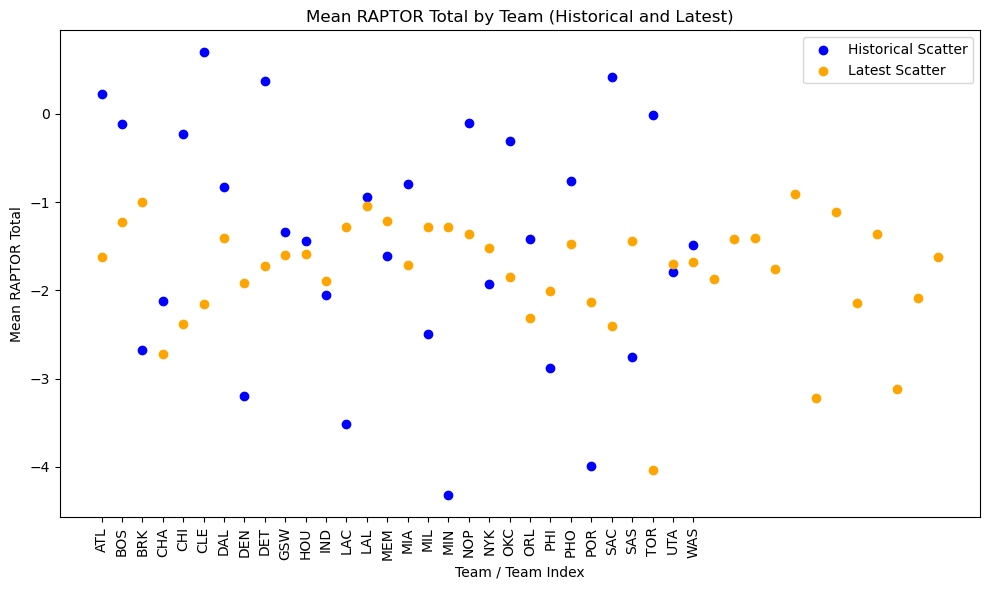

In [105]:
# Create a scatter plot with both historical and latest data
plt.figure(figsize=(10, 6))

# Scatter plot for historical team RAPTOR means
plt.scatter(his_team_raptor_means["team"], his_team_raptor_means["raptor_total"], color="blue", label="Historical Scatter")

# Scatter plot for latest team RAPTOR means
plt.scatter(lat_team_raptor_means.index, lat_team_raptor_means["raptor_total"], color="orange", label="Latest Scatter")

plt.xlabel("Team / Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical and Latest)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
average_his_team_war_totals = historical.groupby("team")["war_total"].mean().reset_index()
average_his_team_war_totals.head()

,team,war_total
0,ATL,1.066317
1,BOS,1.781581
2,BRK,0.804157
3,CHA,0.674670
4,CHI,1.737993


In [93]:
average_lat_team_war_totals = latest.groupby("team")["war_total"].mean().reset_index()
average_lat_team_war_totals.head()

,team,war_total
0,ATL,1.142065
1,BOS,1.439100
2,BRK,0.848481
3,BUF,0.983682
4,CHA,0.967200


C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
C:\Users\wnaiy\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


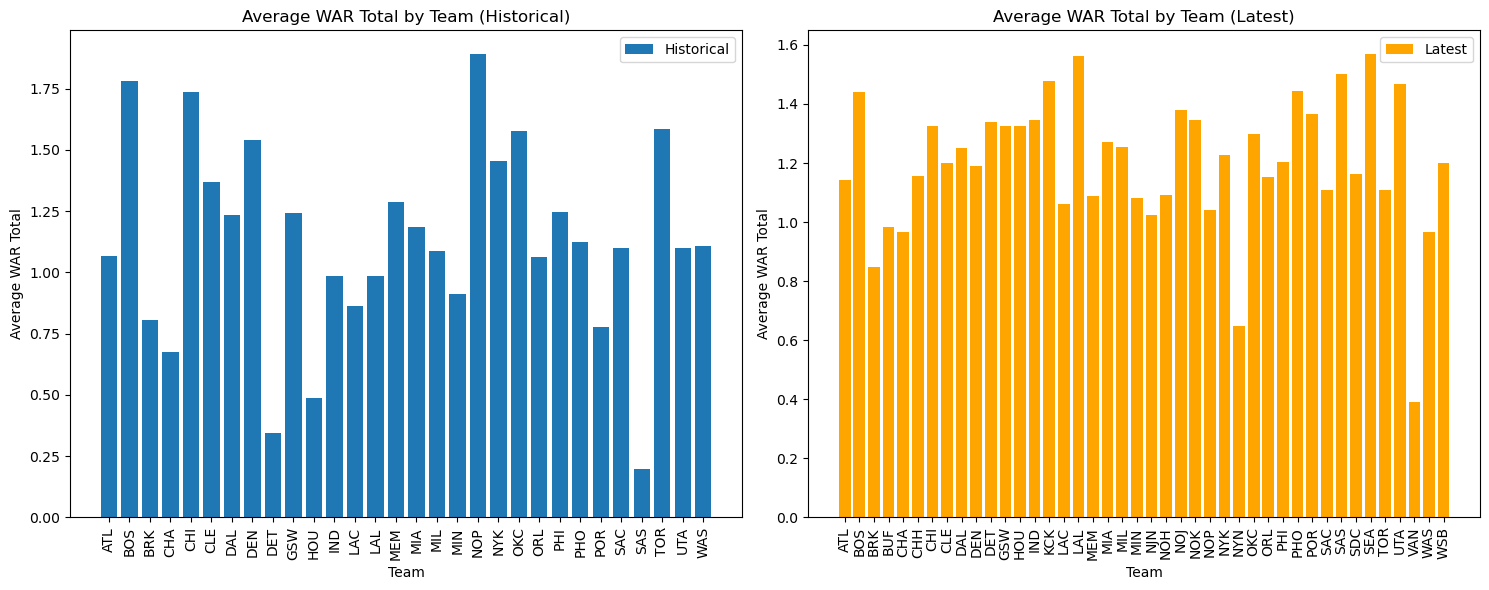

In [101]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot average historical team WAR totals (bar plot)
axes[0].bar(average_his_team_war_totals["team"], average_his_team_war_totals["war_total"], label="Historical")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Average WAR Total")
axes[0].set_title("Average WAR Total by Team (Historical)")
axes[0].set_xticklabels(average_his_team_war_totals["team"], rotation=90)
axes[0].legend()

# Plot average latest team WAR totals (bar plot)
axes[1].bar(average_lat_team_war_totals["team"], average_lat_team_war_totals["war_total"], color="orange", label="Latest")
axes[1].set_xlabel("Team")
axes[1].set_ylabel("Average WAR Total")
axes[1].set_title("Average WAR Total by Team (Latest)")
axes[1].set_xticklabels(average_lat_team_war_totals["team"], rotation=90)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

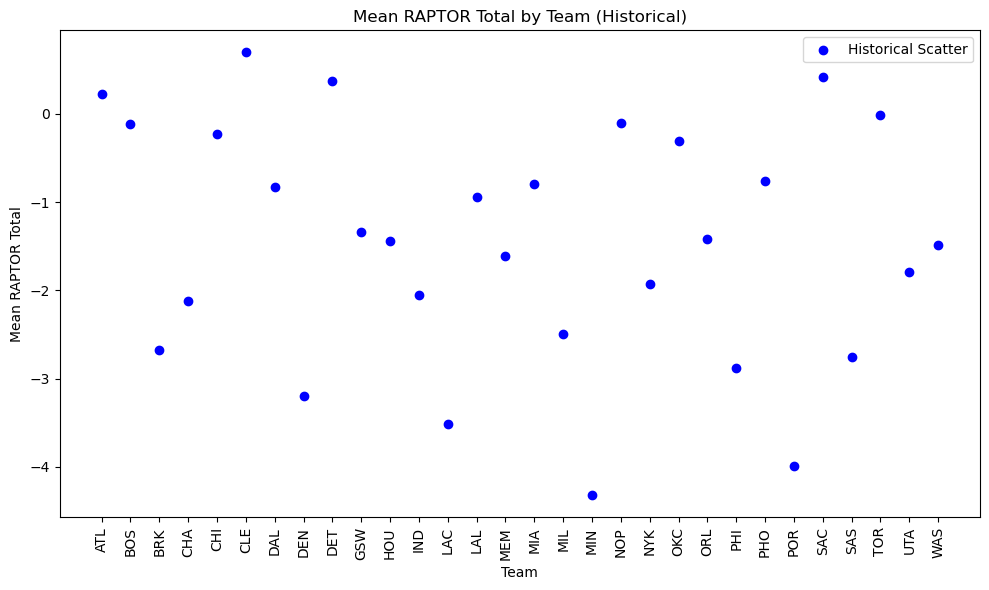

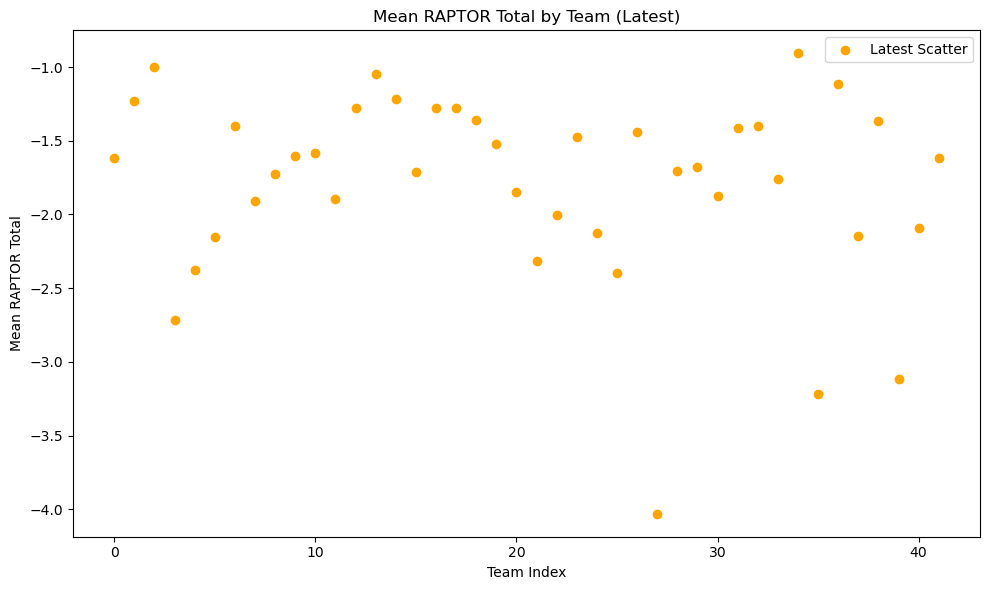

In [102]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(his_team_raptor_means["team"], his_team_raptor_means["raptor_total"], color="blue", label="Historical Scatter")
plt.xlabel("Team")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Historical)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
# Create a scatter plot for latest team RAPTOR means
plt.figure(figsize=(10, 6))
plt.scatter(lat_team_raptor_means.index, lat_team_raptor_means["raptor_total"], color="orange", label="Latest Scatter")
plt.xlabel("Team Index")
plt.ylabel("Mean RAPTOR Total")
plt.title("Mean RAPTOR Total by Team (Latest)")
plt.legend()
plt.tight_layout()
plt.show()

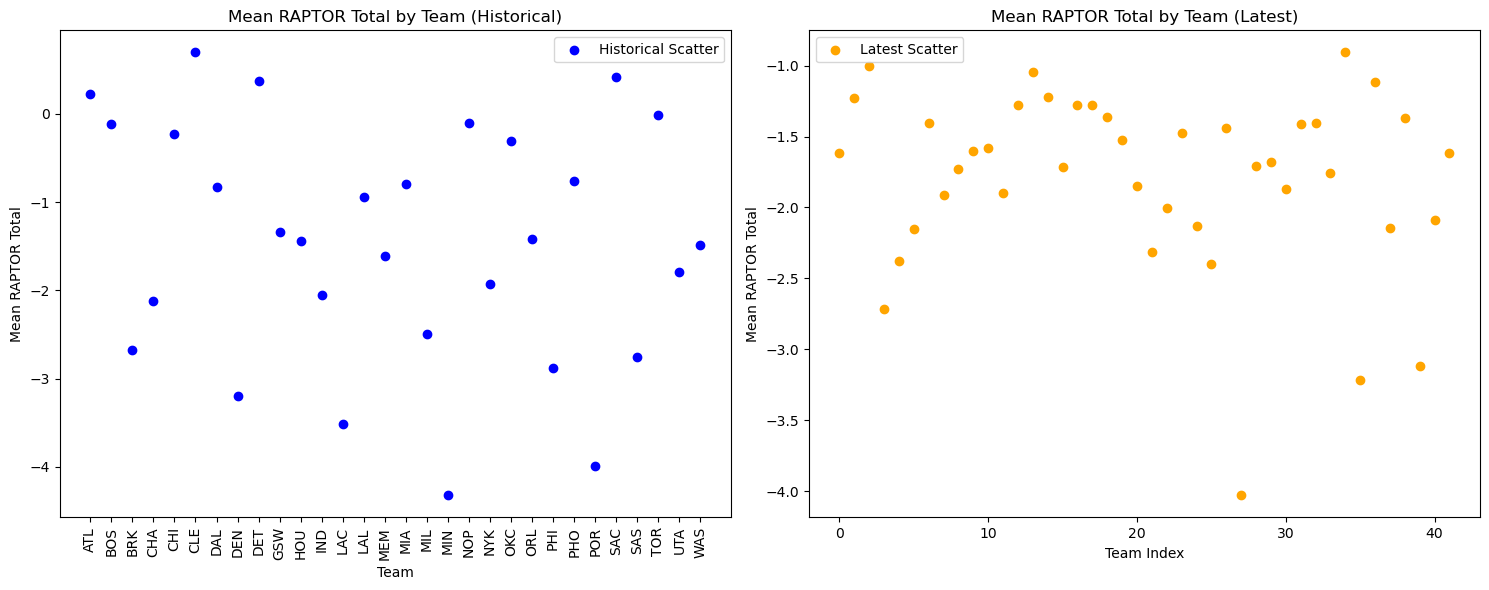

In [103]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for historical team RAPTOR means
axes[0].scatter(his_team_raptor_means["team"], his_team_raptor_means["raptor_total"], color="blue", label="Historical Scatter")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Mean RAPTOR Total")
axes[0].set_title("Mean RAPTOR Total by Team (Historical)")
axes[0].tick_params(axis="x", rotation=90)
axes[0].legend()

# Scatter plot for latest team RAPTOR means
axes[1].scatter(lat_team_raptor_means.index, lat_team_raptor_means["raptor_total"], color="orange", label="Latest Scatter")
axes[1].set_xlabel("Team Index")
axes[1].set_ylabel("Mean RAPTOR Total")
axes[1].set_title("Mean RAPTOR Total by Team (Latest)")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()
